In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df_test = pd.read_json("dataset/test.jsonl",lines=True)[["comment","rating_int"]]
df_train = pd.read_json("dataset/train.jsonl",lines=True)[["comment","rating_int"]]


In [63]:
df_test["comment"] = df_test["comment"].str.lower()
df_train["comment"] = df_train["comment"].str.lower()

In [64]:
def filter_quantiles(x,lower_q=0,uppe_q=0.85):
    x = np.array(x)
    xs = np.argsort(x)
    l = x.shape[0]
    lower = int(l*lower_q)
    upper = int(l*uppe_q)
    return x[xs[lower:upper+1]]

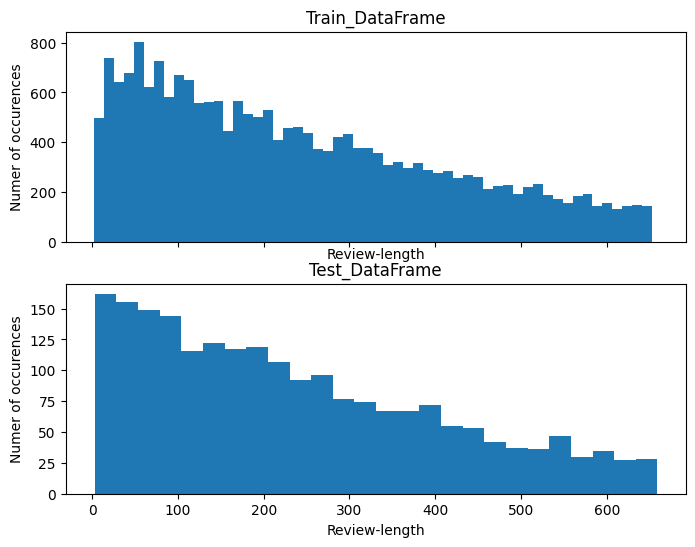

In [65]:
fig, axs = plt.subplots(2,figsize=(8,6),sharex=True)
df_list = [df_train,df_test]
name_list = ["Train","Test"]
for i in range(2):
    tmp = df_list[i]
    axs[i].hist(filter_quantiles(tmp["comment"].str.len()),bins="rice")
    axs[i].set_title(f"{name_list[i]}_DataFrame")
    axs[i].set(xlabel="Review-length",ylabel="Numer of occurences")



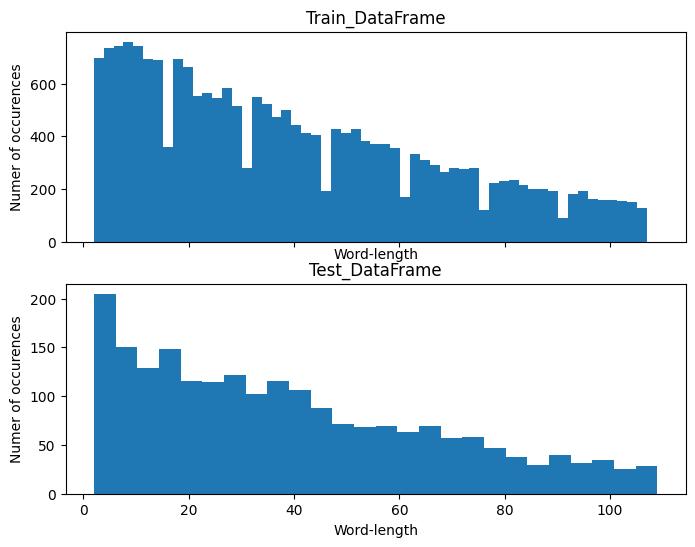

In [66]:
fig, axs = plt.subplots(2,figsize=(8,6),sharex=True)
df_list = [df_train,df_test]
name_list = ["Train","Test"]
for i in range(2):
    tmp = df_list[i]
    tmp_count = tmp["comment"].apply(lambda x : len(x.split(" ")))
    axs[i].hist(filter_quantiles(tmp_count),bins="rice")
    axs[i].set_title(f"{name_list[i]}_DataFrame")
    axs[i].set(xlabel="Word-length",ylabel="Numer of occurences")



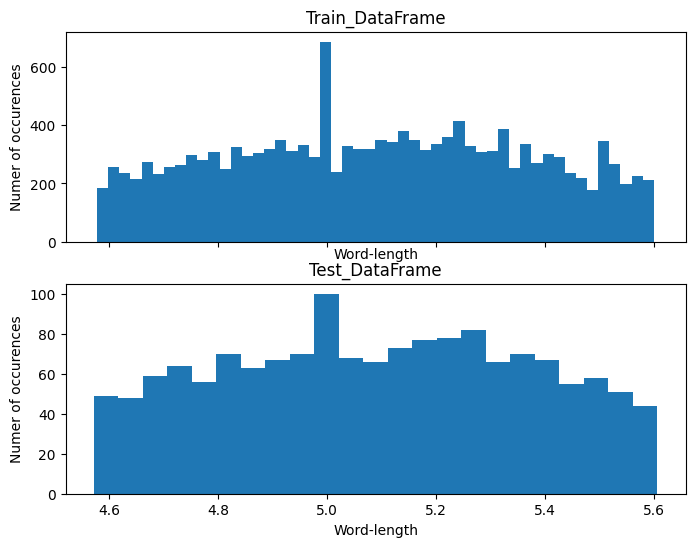

In [67]:
fig, axs = plt.subplots(2,figsize=(8,6),sharex=True)
df_list = [df_train,df_test]
name_list = ["Train","Test"]
for i in range(2):
    tmp = df_list[i]
    axs[i].hist(filter_quantiles(tmp["comment"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)),0.15,0.75),bins="rice")
    axs[i].set_title(f"{name_list[i]}_DataFrame")
    axs[i].set(xlabel="Word-length",ylabel="Numer of occurences")



In [68]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [69]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [70]:
top_2grams_train = get_top_ngram(df_train["comment"],2)
x_train,y_train = map(list,zip(*top_2grams_train))
top_2grams_test = get_top_ngram(df_test["comment"],2)
x_test,y_test = map(list,zip(*top_2grams_test))


c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

<AxesSubplot:>

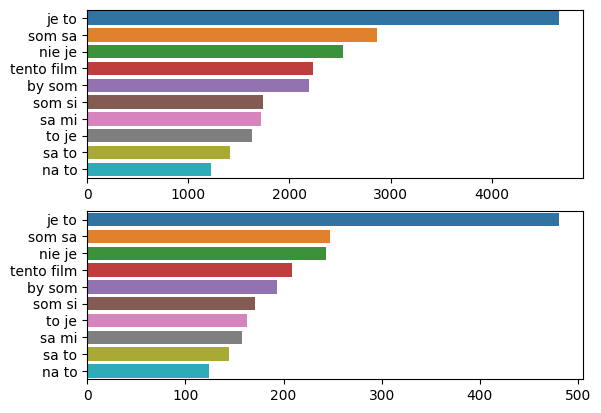

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2)
sns.barplot(x=y_train,y=x_train,ax=axs[0])
sns.barplot(x=y_test,y=x_test,ax=axs[1])


In [72]:
top_3grams_train = get_top_ngram(df_train["comment"],3)
x_train,y_train = map(list,zip(*top_3grams_train))
top_3grams_test = get_top_ngram(df_test["comment"],3)
x_test,y_test = map(list,zip(*top_3grams_test))


c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

<AxesSubplot:>

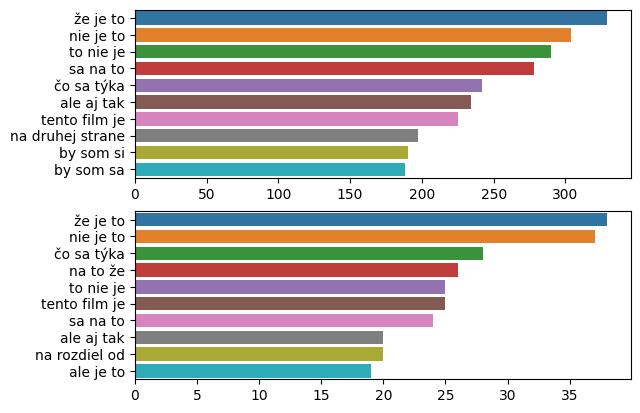

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2)
sns.barplot(x=y_train,y=x_train,ax=axs[0])
sns.barplot(x=y_test,y=x_test,ax=axs[1])


In [74]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
stop=set(stopwords.words('slovak'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\max\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [75]:
corpus=[]
new= df_train['comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic_train=defaultdict(int)
for word in corpus:
    if word in stop:
        dic_train[word]+=1

In [76]:
corpus=[]
new= df_test['comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic_test=defaultdict(int)
for word in corpus:
    if word in stop:
        dic_test[word]+=1

c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<AxesSubplot:>

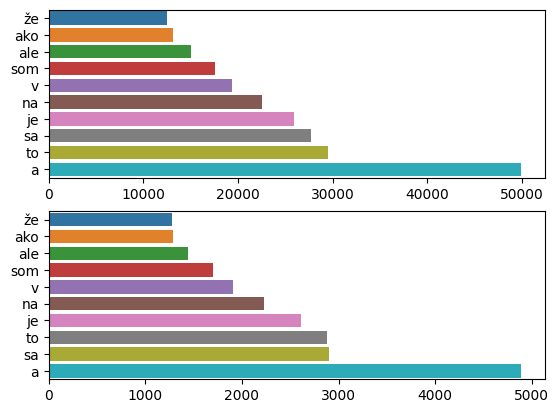

In [77]:
x_train = np.array([k for k in dic_train])
y_train = np.array([dic_train[k] for k in dic_train])
arg_s = np.argsort(y_train)
x_train = x_train[arg_s]
y_train = y_train[arg_s]

x_test = np.array([k for k in dic_test])
y_test = np.array([dic_test[k] for k in dic_test])
arg_s = np.argsort(y_test)
x_test = x_test[arg_s]
y_test = y_test[arg_s]
#sns.barplot(x=y[-10:],y=x[-10:])
fig, axs = plt.subplots(2)
sns.barplot(x=y_train[-10:],y=x_train[-10:],ax=axs[0])
sns.barplot(x=y_test[-10:],y=x_test[-10:],ax=axs[1])


In [78]:
corpus=[]
new= df_train['comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic_train=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic_train[word]+=1

In [79]:
corpus=[]
new= df_test['comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic_test=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic_test[word]+=1

c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<AxesSubplot:>

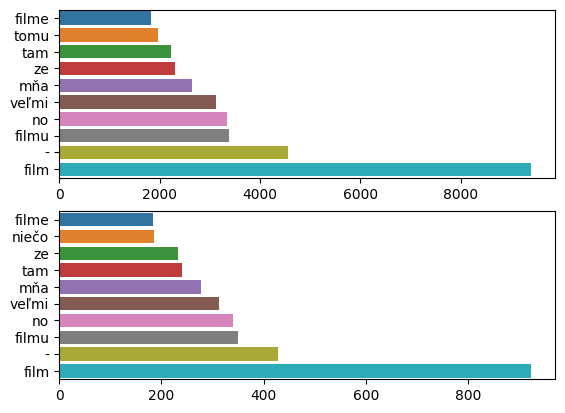

In [80]:
x_train = np.array([k for k in dic_train])
y_train = np.array([dic_train[k] for k in dic_train])
arg_s = np.argsort(y_train)
x_train = x_train[arg_s]
y_train = y_train[arg_s]

x_test = np.array([k for k in dic_test])
y_test = np.array([dic_test[k] for k in dic_test])
arg_s = np.argsort(y_test)
x_test = x_test[arg_s]
y_test = y_test[arg_s]
fig, axs = plt.subplots(2)
sns.barplot(x=y_train[-10:],y=x_train[-10:],ax=axs[0])
sns.barplot(x=y_test[-10:],y=x_test[-10:],ax=axs[1])
